 ### Satisfaction Analysis

In [1]:
import os
import sys
sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
from scripts.userAnalysis import UserAnalysis
from scripts.database import DataBaseConnection
from scripts.experienceAnalysis import ExperienceAnalytics
from scripts.satisfaction_analysis import SatisfactionAnalysis

### Database connection 

In [3]:
host=os.getenv("DB_HOST")
database=os.getenv("DB_DATABASE")
user=os.getenv("DB_USER")
password=os.getenv("DB_PASSWORD")
port=os.getenv("DB_PORT")
db=DataBaseConnection(host, database, user,password,port)

In [4]:
user_analysis=UserAnalysis()

In [5]:
connection=user_analysis.creating_connection(db)

Connection to database successful


##### Data reading

In [6]:
data=user_analysis.read_data(db, connection)

Connection to database closed


In [7]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Data cleaning and preparation

In [8]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
processingData=user_analysis.handleMissing(data)

In [10]:
processingData.head()

,Start,End,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
62,4/21/2019 2:55,4/25/2019 0:17,D72939C,Huawei,Huawei B528S-23A,1.304243e+19,73.0,262.0,336160.0,2.082018e+14,...,18426843.0,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0,1.432000e+03,759658.664811
65,4/21/2019 8:26,4/25/2019 1:20,L11120C,Samsung,Samsung Galaxy S6 Edge (Sm-G925X),1.311448e+19,605.0,655.0,320001.0,2.082017e+14,...,20574393.0,624225.0,552413006.0,1112977.0,142091905.0,1299874.0,18261248.0,597244693.0,2.080991e+07,759658.664811
66,4/21/2019 8:54,4/25/2019 0:48,L11864B,Samsung,Samsung Galaxy S9 Sm-G960F Ds,7.349883e+18,105.0,931.0,316419.0,2.082019e+14,...,19227109.0,13789484.0,507419487.0,9991757.0,348565519.0,3391925.0,50065095.0,538809148.0,2.080991e+07,759658.664811
67,4/21/2019 9:19,4/25/2019 4:42,D73388C,Samsung,Samsung Galaxy A6 Sm-A600Fn Ds,1.311448e+19,590.0,965.0,329003.0,2.082021e+14,...,15416344.0,6144270.0,124816679.0,1214873.0,483852157.0,6057834.0,29436200.0,162196572.0,2.080991e+07,759658.664811
68,4/21/2019 10:09,4/25/2019 1:39,T72937C,Samsung,Samsung Galaxy A8 (2018),1.304243e+19,1.0,272.0,314961.0,2.082014e+14,...,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,7.659680e+05,31267.000000


In [11]:
processingData.isnull().sum()

Start                             0
End                               0
Last Location Name                0
Handset Manufacturer              0
Handset Type                      0
Bearer Id                         0
Start ms                          0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Nb of sec with Vol DL < 6250

In [12]:
df_cleand=user_analysis.feature_engineering(processingData)

In [13]:
df_cleand.head()

,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Session_Duration
62,D72939C,Huawei,Huawei B528S-23A,1.304243e+19,336160.0,2.082018e+14,3.376353e+10,8.637690e+13,52.000000,11.000000,...,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0,1.432000e+03,759658.664811,336120.0
65,L11120C,Samsung,Samsung Galaxy S6 Edge (Sm-G925X),1.311448e+19,320001.0,2.082017e+14,3.366364e+10,3.564211e+13,30.000000,3.000000,...,624225.0,552413006.0,1112977.0,142091905.0,1299874.0,18261248.0,597244693.0,2.080991e+07,759658.664811,320040.0
66,L11864B,Samsung,Samsung Galaxy S9 Sm-G960F Ds,7.349883e+18,316419.0,2.082019e+14,3.366010e+10,3.579881e+13,109.795706,17.662883,...,13789484.0,507419487.0,9991757.0,348565519.0,3391925.0,50065095.0,538809148.0,2.080991e+07,759658.664811,316440.0
67,D73388C,Samsung,Samsung Galaxy A6 Sm-A600Fn Ds,1.311448e+19,329003.0,2.082021e+14,3.365079e+10,3.575751e+13,109.795706,17.662883,...,6144270.0,124816679.0,1214873.0,483852157.0,6057834.0,29436200.0,162196572.0,2.080991e+07,759658.664811,328980.0
68,T72937C,Samsung,Samsung Galaxy A8 (2018),1.304243e+19,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,853.000000,2.000000,...,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,7.659680e+05,31267.000000,315000.0


### Experience Analysis

In [14]:
experienceData=ExperienceAnalytics(df_cleand)

##### ***Aggregation per Customer***

In [15]:
aggregatedData=experienceData.aggregation_per_customer()

   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0   3.360100e+10                 2.080991e+07                759658.664811   
1   3.360100e+10                 2.080991e+07                759658.664811   
2   3.360100e+10                 2.080991e+07                759658.664811   
3   3.360101e+10                 1.066000e+03                759658.664811   
4   3.360101e+10                 2.080991e+07                759658.664811   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0        46.000000         0.000000                     37.0   
1        30.000000         1.000000                     48.0   
2       109.795706        17.662883                     48.0   
3        69.000000        15.000000                    204.0   
4        28.000000         0.000000                     23.0   

   Avg Bearer TP UL (kbps)                    Handset Type  \
0                     39.0  Huawei P20 Lite Huawei Nova 3E   
1                     

- Calculating engagement and experience scores for each user based on the clustering done in Task 3. Then, computing the satisfaction score, build a predictive model, and perform additional clustering and analysis.

In [16]:
aggregatedData.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type',
       'Avg TCP Retransmission', 'Avg RTT', 'Avg Throughput'],
      dtype='object')

   Cluster     Avg RTT  Avg TCP Retransmission  Avg Throughput
0        0   37.636281            1.060095e+07      532.823307
1        1   52.440454            1.935824e+06    12476.492872
2        2  454.033832            2.682012e+06     3190.607460


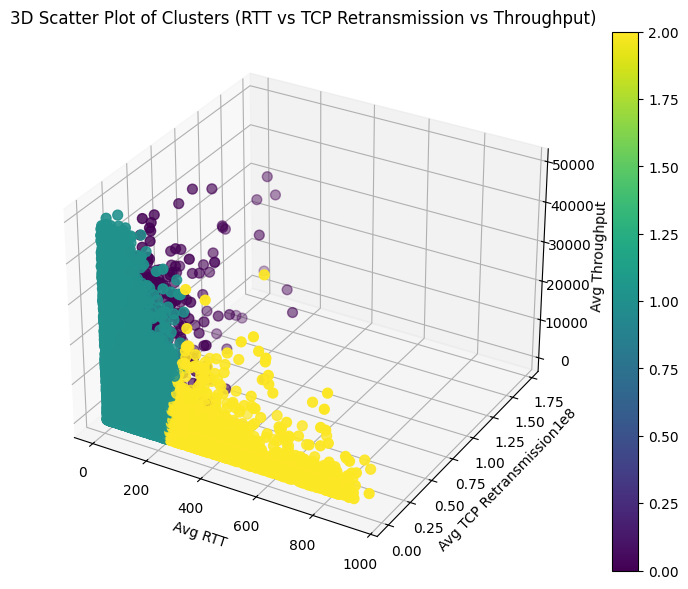

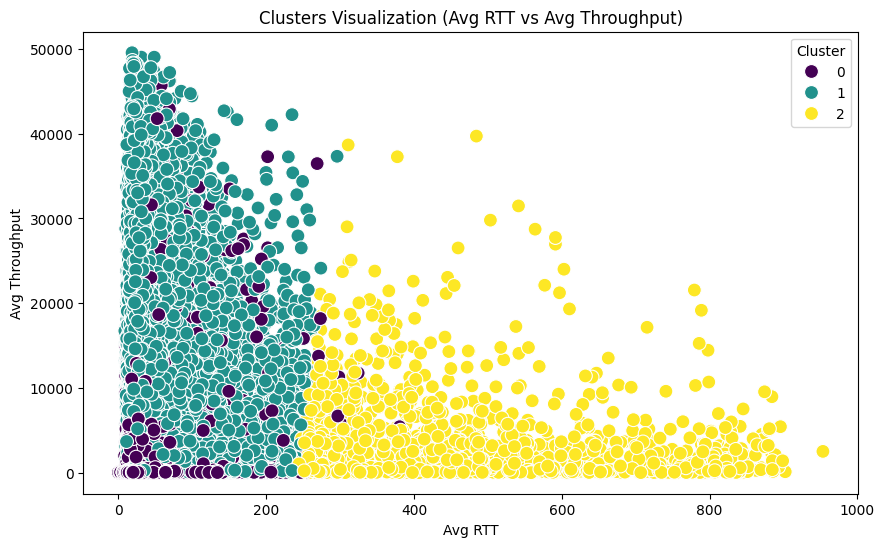

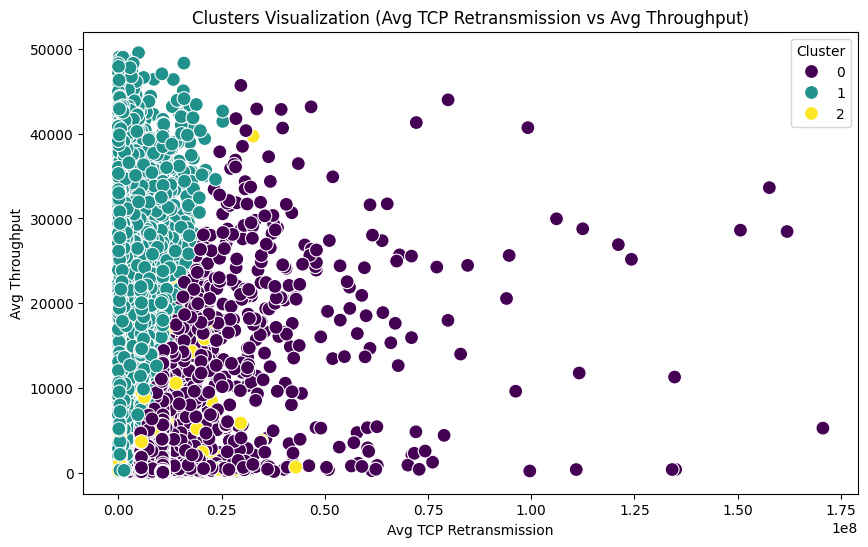

In [17]:
featured_scales, kmeans=experienceData.kmeans_clustering(aggregatedData)

### Satisfaction Analysis
Computing the satisfaction score, build a predictive model, and perform additional clustering and analysis.
- #### Assign Engagement and Experience Scores
- The engagement score is calculated as the Euclidean distance between the user's data point and the less engaged cluster (from Task 3).

- The experience score is calculated as the Euclidean distance between the user's data point and the worst experience cluster (from Task 3).

In [18]:
satisfactionAnalysis=SatisfactionAnalysis()

In [19]:
scoreData=satisfactionAnalysis.eculidean_distance_engagement_core(aggregatedData, kmeans,featured_scales,)

In [20]:
# Step 5: Display the scores
scoreData[['Engagement Score', 'Experience Score']].head()

,Engagement Score,Experience Score
0,0.233032,2.408386
1,0.342292,2.430934
2,0.400804,2.372159
3,2.031354,1.612512
4,0.364891,2.437735


In [21]:
scoreData.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,Avg TCP Retransmission,Avg RTT,Avg Throughput,Cluster,Engagement Score,Experience Score
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,1.078479e+07,23.000000,38.0,0,0.233032,2.408386
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),1.078479e+07,15.500000,49.5,0,0.342292,2.430934
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined,1.078479e+07,63.729294,48.5,0,0.400804,2.372159
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),3.803623e+05,42.000000,124.0,1,2.031354,1.612512
4,3.360101e+10,2.080991e+07,759658.664811,28.000000,0.000000,23.0,40.0,Apple iPhone Se (A1723),1.078479e+07,14.000000,31.5,0,0.364891,2.437735


#### Satisfaction Score (Average of Engagement & Experience Scores)

In [22]:
satisfactionAnalysis.satisfaction_score(scoreData)

       MSISDN/Number  Satisfaction Score
15646   3.363184e+10           32.660253
71321   3.368071e+10           31.071325
61838   3.366822e+10           30.285464
37282   3.366057e+10           28.833491
45164   3.366264e+10           25.683448
30089   3.365871e+10           25.586270
88997   3.376276e+10           25.419280
87069   3.376179e+10           23.573230
55016   3.366560e+10           23.048501
50178   3.366407e+10           21.371554


#### Build a Regression Model to Predict Satisfaction Score
- Building a regression model using the features like Avg RTT, Avg TCP Retransmission, and Avg Throughput to predict the satisfaction score, .

In [23]:
satisfactionAnalysis.predicting_satisfactionScore(scoreData)

Mean Squared Error: 0.2169180898741087
Regression Coefficients: [1.14511636e-02 6.40074773e-08 6.80567593e-05]


#### Perform K-means Clustering on Engagement & Experience Scores
- Next, performing  k-means clustering on the Engagement and Experience scores to create new user segments.

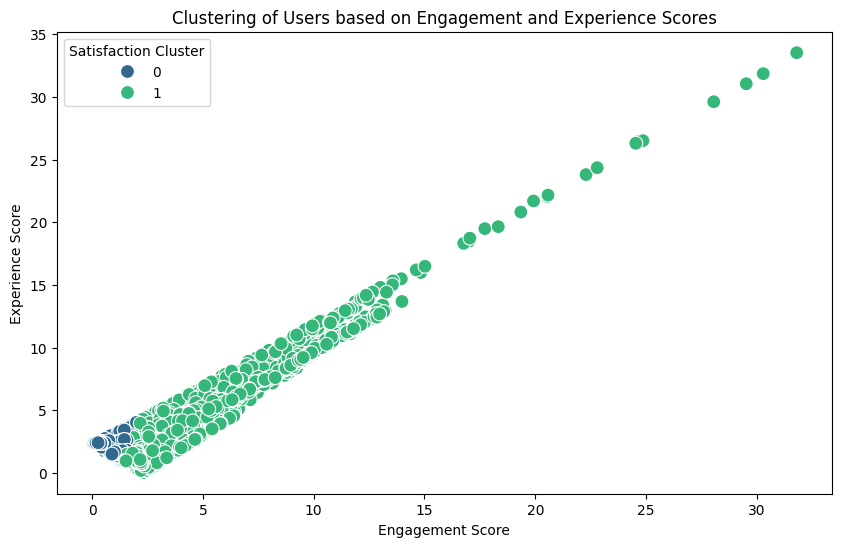

In [24]:
satisfactionAnalysis.kmeans_clustring_on_Engament_and_experience_score(scoreData)

In [25]:
satisfactionAnalysis.Aggregate_satisfaction_and_experiance_score_per_cluster(scoreData)

,Satisfaction Cluster,Satisfaction Score,Experience Score
0,0,1.355200,2.302697
1,1,2.313453,1.696828


In [26]:
aggregatedData.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,Avg TCP Retransmission,Avg RTT,Avg Throughput,Cluster,Engagement Score,Experience Score,Satisfaction Score,Satisfaction Cluster
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,1.078479e+07,23.000000,38.0,0,0.233032,2.408386,1.320709,0
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),1.078479e+07,15.500000,49.5,0,0.342292,2.430934,1.386613,0
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined,1.078479e+07,63.729294,48.5,0,0.400804,2.372159,1.386482,0
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),3.803623e+05,42.000000,124.0,1,2.031354,1.612512,1.821933,1
4,3.360101e+10,2.080991e+07,759658.664811,28.000000,0.000000,23.0,40.0,Apple iPhone Se (A1723),1.078479e+07,14.000000,31.5,0,0.364891,2.437735,1.401313,0


In [27]:
scoreData.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,Avg TCP Retransmission,Avg RTT,Avg Throughput,Cluster,Engagement Score,Experience Score,Satisfaction Score,Satisfaction Cluster
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,1.078479e+07,23.000000,38.0,0,0.233032,2.408386,1.320709,0
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),1.078479e+07,15.500000,49.5,0,0.342292,2.430934,1.386613,0
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined,1.078479e+07,63.729294,48.5,0,0.400804,2.372159,1.386482,0
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),3.803623e+05,42.000000,124.0,1,2.031354,1.612512,1.821933,1
4,3.360101e+10,2.080991e+07,759658.664811,28.000000,0.000000,23.0,40.0,Apple iPhone Se (A1723),1.078479e+07,14.000000,31.5,0,0.364891,2.437735,1.401313,0


 #### Export User Data to Postgres Database

In [28]:
scoreData=scoreData.rename(columns={"MSISDN/Number":"MSISDN"})

In [29]:
scoreData.columns

Index(['MSISDN', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'Handset Type', 'Avg TCP Retransmission',
       'Avg RTT', 'Avg Throughput', 'Cluster', 'Engagement Score',
       'Experience Score', 'Satisfaction Score', 'Satisfaction Cluster'],
      dtype='object')

In [30]:
saveDataconnection=user_analysis.creating_connection(db)

Connection to database successful


In [31]:
satisfactionAnalysis.exportingData_to_mysql(scoreData,db, saveDataconnection)

'Query executed successfully and all data added'

In [32]:
satsifactionData=satisfactionAnalysis.read_data(db,saveDataconnection)

Connection to database closed


In [33]:
satsifactionData

,msisdn,engagement_score,experience_score,satisfaction_score
0,33601001722,0.233032,2.408386,1.320709
1,33601001754,0.342292,2.430934,1.386613
2,33601002511,0.400804,2.372159,1.386482
3,33601007832,2.031354,1.612512,1.821933
4,33601008617,0.364891,2.437735,1.401313
5,33601010682,1.013353,1.537759,1.275556
6,33601011634,1.688495,0.940814,1.314655
7,33601011959,2.037344,1.593292,1.815318
8,33601014694,0.400829,2.372265,1.386547
9,33601020306,0.122574,2.331141,1.226858


In [34]:
from src.model_tracking import PredictionModel

In [35]:
model=PredictionModel(satsifactionData)

In [36]:
prediction, mse=model.prediction()

--------___data_____------------         msisdn  engagement_score  experience_score  satisfaction_score
0  33601001722          0.233032          2.408386            1.320709
1  33601001754          0.342292          2.430934            1.386613
2  33601002511          0.400804          2.372159            1.386482
3  33601007832          2.031354          1.612512            1.821933
4  33601008617          0.364891          2.437735            1.401313
5  33601010682          1.013353          1.537759            1.275556
6  33601011634          1.688495          0.940814            1.314655
7  33601011959          2.037344          1.593292            1.815318
8  33601014694          0.400829          2.372265            1.386547
9  33601020306          0.122574          2.331141            1.226858


2024/09/10 17:45:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [37]:
prediction

array([1.36183927, 1.38412951])

In [38]:
mse

np.float64(0.0003083213430710621)